## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [5]:
# TODO
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

data_hf = pd.read_csv(url)

print(data_hf.head())


missing_values = data_hf.isnull().sum()

print(missing_values)

duplicate_records = data_hf.duplicated().sum()

print(f"Number of duplicate records: {duplicate_records}")

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

**Obsahuje dataset duplicitné záznamy?**

### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [8]:
sex_counts = data_hf['sex'].value_counts()

print(f"Number of female records (0): {sex_counts.get(0, 0)}")
print(f"Number of male records (1): {sex_counts.get(1, 0)}")

non_smokers = data_hf[data_hf['smoking'] == 0]['sex'].value_counts()

print(f"Number of female non-smokers (0): {non_smokers.get(0, 0)}")
print(f"Number of male non-smokers (1): {non_smokers.get(1, 0)}")

Number of female records (0): 105
Number of male records (1): 194
Number of female non-smokers (0): 101
Number of male non-smokers (1): 102


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [9]:
# TODO
age_min = data_hf['age'].min()
age_max = data_hf['age'].max()
age_mean = data_hf['age'].mean()
age_mode = data_hf['age'].mode()[0]

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")
print(f"Average age: {age_mean:.2f}")
print(f"Most frequent age: {age_mode}")

Minimum age: 40.0
Maximum age: 95.0
Average age: 60.83
Most frequent age: 60.0


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

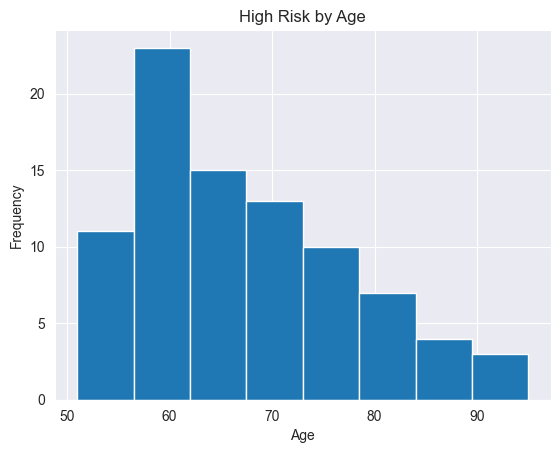

In [11]:
import matplotlib.pyplot as plt

data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('Risk smrti podla veku')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

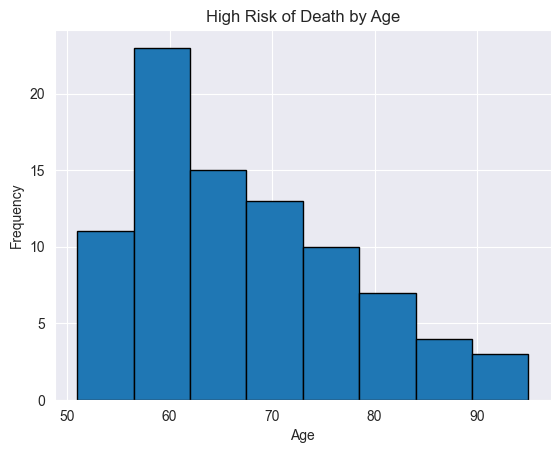

Age group with the highest risk of heart failure: 60.0 years
Number of records in this age group: 18


In [14]:
# TODO
import matplotlib.pyplot as plt

high_risk = data_hf[data_hf['risk'] == 'High']

plt.hist(high_risk['age'], bins='auto', edgecolor='black')
plt.title('Risk smrti podla veku')
plt.xlabel('Age / Vek')
plt.ylabel('Frequency / Frekvencia')
plt.show()

age_counts = high_risk['age'].value_counts().sort_values(ascending=False)
highest_risk_age = age_counts.index[0]
highest_risk_count = age_counts.iloc[0]

print(f"Vek s najvyssou pravdepodobnostou: {highest_risk_age} rokov")
print(f"Pocet zaznamov v tejto skupine: {highest_risk_count}")


**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


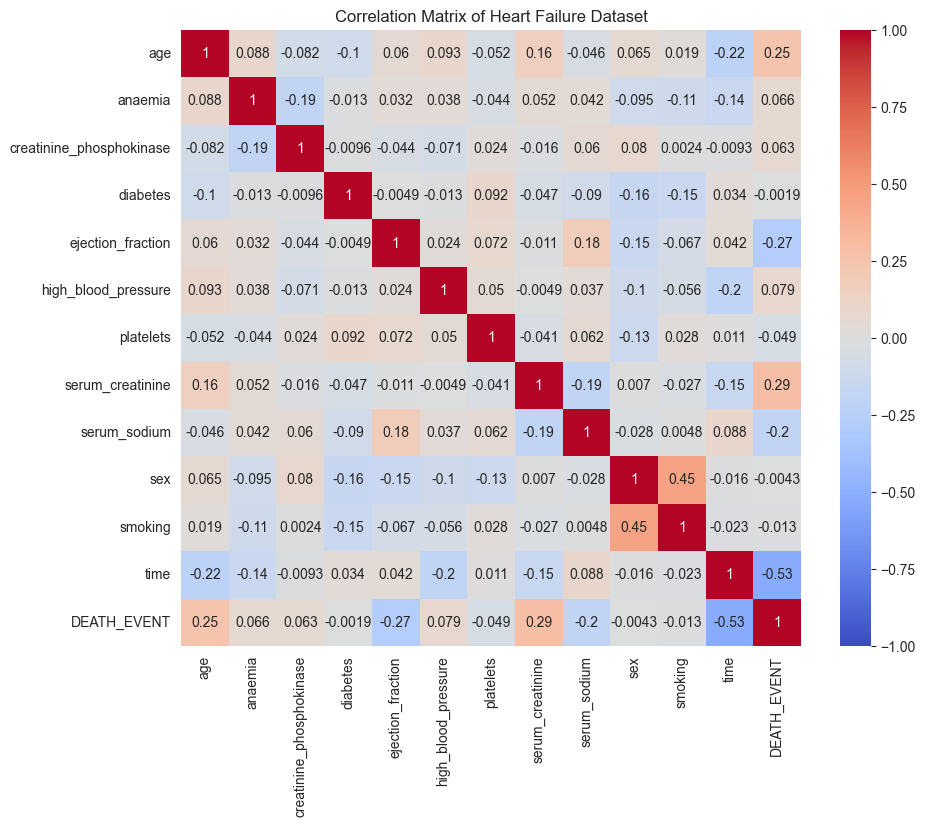

Attributes with the highest negative correlation:
DEATH_EVENT  time          -0.526964
time         DEATH_EVENT   -0.526964
dtype: float64
Attributes with the highest positive correlation:
sex      smoking    0.445892
smoking  sex        0.445892
dtype: float64


In [22]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data_hf.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacna Matica datasetusrdcovych zlyhani')
plt.show()

corr_pairs = corr_matrix.unstack().sort_values()

negative_corr_pairs = corr_pairs[corr_pairs < 0].head(2)

print("Najvyssia negativna korelacia:")
print(negative_corr_pairs)

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

positive_corr_pairs = corr_pairs[corr_pairs < 1].head(2)

print("Najvyssia positivna korelacia:")
print(positive_corr_pairs)

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure